<a href="https://colab.research.google.com/github/rakeshsurampalli/smart_investment/blob/master/MOVING_AVERAGE_WITH_BOLLINGER_BANDS_%2CLOG_RETURN_%2CNORMAL_RETURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
gld = pdr.get_data_yahoo("GLD","2016-11-08")
gld.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-11-08,123.089996,121.360001,122.120003,121.639999,9480600,121.639999
2016-11-09,124.349998,121.110001,124.300003,121.559998,18236500,121.559998
2016-11-10,121.540001,119.379997,121.519997,119.750000,22268000,119.750000
2016-11-11,119.690002,116.230003,119.650002,117.099998,20381800,117.099998
2016-11-14,117.139999,115.489998,116.120003,116.110001,20729400,116.110001


In [0]:
gld_close = pd.DataFrame(gld.Close)

MOVING AVERAGE

In [0]:
gld_close["MA_9"] = gld_close.Close.rolling(9).mean().shift()
gld_close["MA_21"] = gld_close.Close.rolling(21,center=True).mean()

BOLLINGER BANDS


In [0]:
gld_close["SD_20"] = gld_close.Close.rolling(20).std()

gld_close["UPPER"] = gld_close["MA_21"] + 2*gld_close["SD_20"]
gld_close["LOWER"] = gld_close["MA_21"] - 2*gld_close["SD_20"]

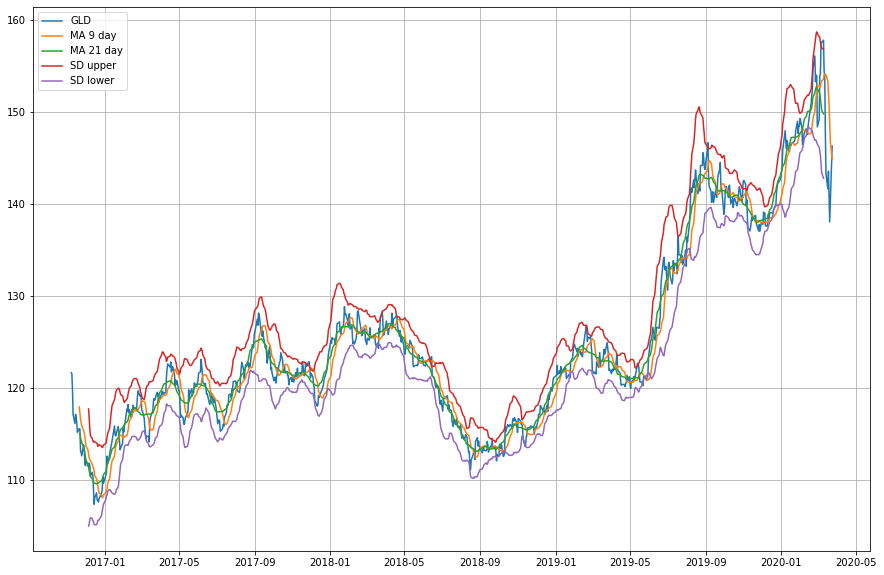

In [0]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(gld_close["Close"],label = "GLD")
plt.plot(gld_close["MA_9"],label = "MA 9 day")
plt.plot(gld_close["MA_21"],label = "MA 21 day")
plt.plot(gld_close["UPPER"],label = "SD upper")
plt.plot(gld_close["LOWER"],label = "SD lower")
plt.legend(loc=2)

LOG RETURN

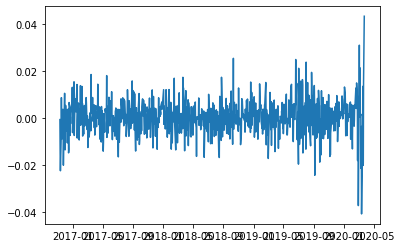

In [0]:
gld_close["log_change"] = np.log(gld_close["Close"]/gld_close["Close"].shift())
plt.plot(gld_close.log_change)

normal return


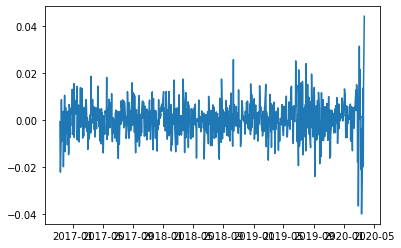

In [0]:
gld_close["change"] = gld_close["Close"]/gld_close["Close"].shift()-1
plt.plot(gld_close.change)
